**Tabla de contenido**

- [Examinando el modelo SARIMA(p,d,q)(P,D,Q)m](#Examinando-el-modelo-SARIMA(p,d,q)(P,D,Q)m)
- [Pronosticando el número de pasajeros mensuales](#Pronosticando-el-numero-de-pasajeros-mensuales)
    - [Pronóstico con un modelo ARIMA(p,d,q)](#Pronostico-con-un-modelo-ARIMA(p,d,q))
    - [Pronóstico con un modelo SARIMA(p,d,q)(P,D,Q)m](#Pronostico-con-un-modelo-SARIMA(p,d,q)(P,D,Q)m)
 

En el capítulo anterior, cubrimos el modelo de media móvil integrada autorregresiva, ARIMA(p,d,q), que nos permite modelar series temporales no estacionarias. Ahora añadiremos otra capa de complejidad al modelo ARIMA para incluir patrones estacionales en series temporales, lo que nos llevará al modelo SARIMA.

`El modelo de media móvil integrada autorregresiva estacional (SARIMA), o SARIMA(p,d,q)(P,D,Q)m, añade otro conjunto de parámetros que nos permite tener en cuenta patrones periódicos al pronosticar una serie temporal, lo cual no siempre es posible con un modelo ARIMA(p,d,q).`

En este capítulo, examinaremos el modelo SARIMA(p,d,q)(P,D,Q)m y adaptaremos nuestro procedimiento general de modelado para tener en cuenta los nuevos parámetros. También determinaremos cómo identificar patrones estacionales en una serie temporal y aplicaremos el modelo SARIMA para pronosticar una serie temporal estacional. Específicamente, aplicaremos el modelo para pronosticar el número total de pasajeros mensuales de una aerolínea. Los datos se registraron desde enero de 1949 hasta diciembre de 1960.

# Examinando el modelo SARIMA(p,d,q)(P,D,Q)m

El modelo SARIMA(p,d,q)(P,D,Q)m se expande sobre el modelo ARIMA(p,d,q) del capítulo anterior al agregar parámetros estacionales. Notarás cuatro nuevos parámetros en el modelo: P, D, Q y m. Los tres primeros tienen el mismo significado que en el modelo ARIMA(p,d,q), pero son sus contrapartes estacionales. Para entender el significado de estos parámetros y cómo afectan el modelo final, primero debemos definir m.

El parámetro m representa la frecuencia. En el contexto de una serie temporal, la frecuencia se define como el número de observaciones por ciclo. La longitud del ciclo dependerá del conjunto de datos. Para los datos que se registraron cada año, trimestre, mes o semana, la longitud de un ciclo se considera de 1 año. Si los datos se registraron anualmente, m = 1 ya que solo hay una observación por año. Si los datos se registraron trimestralmente, m = 4 ya que hay cuatro trimestres en un año, y por lo tanto cuatro observaciones por año. Por supuesto, si los datos se registraron mensualmente, m = 12. Finalmente, para datos semanales, m = 52. La Tabla 8.1 indica el valor apropiado de m según la frecuencia con la que se recopilaron los datos.
![Frecuencias](fig/frecuencia.png)

Cuando se recogen datos a diario o de forma subdiaria, hay múltiples maneras de interpretar la frecuencia. Por ejemplo, los datos diarios pueden tener una estacionalidad semanal. En ese caso, la frecuencia es m = 7 porque habría siete observaciones en un ciclo completo de 1 semana. También podría tener una estacionalidad anual, lo que significa que m = 365. Así, puedes ver que los datos diarios y subdiarios pueden tener una longitud de ciclo diferente, y por lo tanto, una frecuencia m diferente. La tabla 8.2 proporciona el valor adecuado de m dependiendo del ciclo estacional para datos diarios y subdiarios.

![Frecuencias2](fig/frecuencia2.png)

Ahora que entiendes el parámetro m, los significados de P, D y Q se vuelven intuitivos. Como se mencionó antes, son los contrapartes estacionales de los parámetros p, d y q que conoces del modelo ARIMA(p,d,q).

Consideremos un ejemplo donde m = 12. Si P = 2, esto significa que estamos incluyendo dos valores pasados de la serie con un rezago que es un múltiplo de m. Por lo tanto, incluiremos los valores en $y_{t–12}$ y $y_{t–24}$.

De manera similar, si D = 1, esto significa que una diferencia estacional hace que la serie sea estacionaria. En este caso, una diferencia estacional se expresaría como la siguiente ecuación: $$y'_t = y_t – y_{t–12}$$

En una situación donde Q = 2, incluiremos los términos de error pasados en retrasos que sean un múltiplo de m. Por lo tanto, incluiremos los errores $ϵ_{t–12}$ y $ϵ_{t–24}$.


`Una forma de identificar patrones estacionales en una serie temporal es mediante la descomposición de series temporales`, un método que utilizamos por primera vez en el capítulo 1. La descomposición de series temporales es una tarea estadística que separa la serie temporal en sus tres componentes principales: un componente de tendencia, un componente estacional y los residuales.

El componente de tendencia representa el cambio a largo plazo en la serie temporal. Este componente es responsable de las series temporales que aumentan o disminuyen con el tiempo. El componente estacional es, por supuesto, el patrón estacional en la serie temporal. Representa fluctuaciones repetidas que ocurren durante un período fijo de tiempo. Finalmente, los residuos, o el ruido, expresan cualquier irregularidad que no puede ser explicada por la tendencia o el componente estacional.

Con la descomposición de series temporales, podemos identificar y visualizar claramente el componente estacional de una serie temporal. Podemos descomponer el conjunto de datos de pasajeros de avión utilizando la función STL de la biblioteca statsmodels.

In [1]:
import os
import pandas as pd

path_file = lambda file: os.path.join(os.getcwd(),'data', file)
df = pd.read_csv(path_file('air-passengers.csv'))

1. Descomponga la serie utilizando la función STL. El período es igual a la frecuencia m. `Dado que tenemos datos mensuales, el período es 12`.
2. Representa cada componente en una figura.

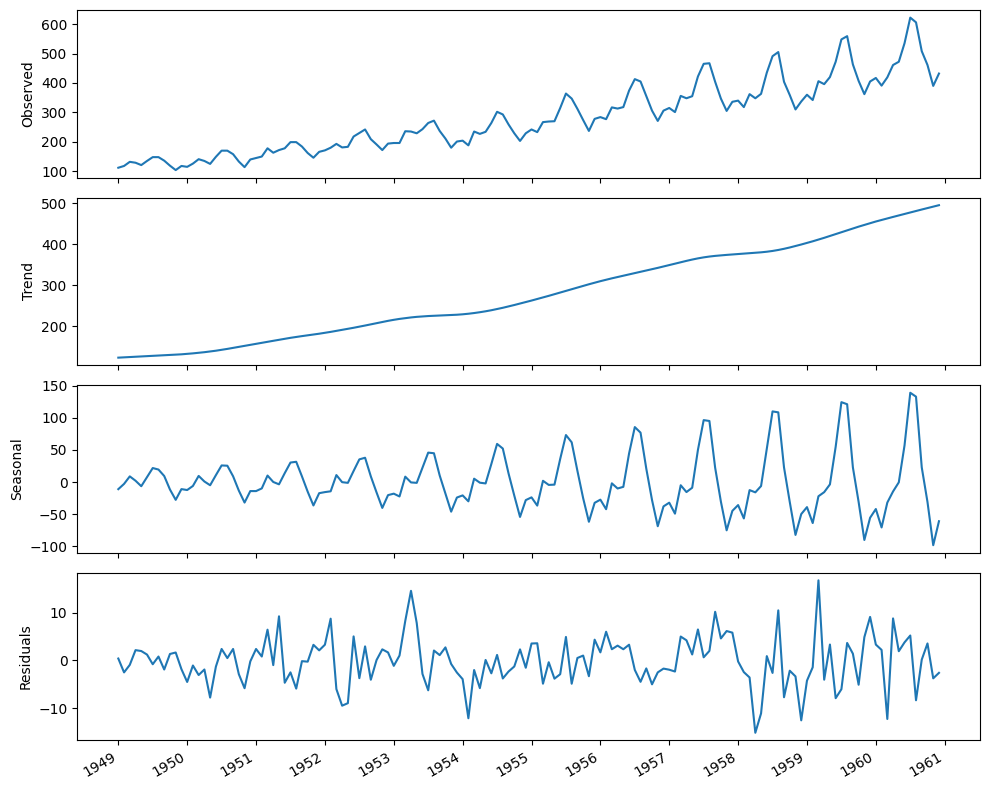

In [3]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np
decomposition = STL(df['Passengers'], period=12).fit() #❶
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(10,8)) #❷
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')
plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))
fig.autofmt_xdate()
plt.tight_layout()

Puedes ver cómo la descomposición de series temporales puede ayudarnos a determinar si nuestros datos son estacionales o no. Este es un método gráfico y no una prueba estadística, pero es suficiente para determinar si una serie es estacional o no, de modo que podamos aplicar el modelo apropiado para la previsión. De hecho, `no hay pruebas estadísticamente para identificar la estacionalidad en series temporales`.

Ahora que sabes cómo identificar patrones estacionales en una serie, podemos pasar a adaptar el procedimiento general de modelado para incluir los nuevos parámetros del modelo SARIMA(p,d,q)(P,D,Q)m y predecir el número de pasajeros aéreos mensuales.

# Pronosticando el numero de pasajeros mensuales

En el capítulo anterior, adaptamos nuestro procedimiento general de modelado para tener en cuenta el nuevo parámetro d en el modelo ARIMA que nos permite pronosticar series temporales no estacionarias. Ahora debemos modificarlo nuevamente para tener en cuenta los nuevos parámetros del modelo SARIMA, que son P, D, Q y m.

El primer paso para recopilar datos permanece intacto. Luego, todavía verificamos la estacionaridad y aplicamos una transformación para establecer el parámetro d. Sin embargo, también podemos realizar la diferenciación estacional para hacer que la serie sea estacionaria, y D será igual al número mínimo de veces que aplicamos la diferenciación estacional.

Luego establecemos un rango de valores posibles para p, q, P y Q, ya que el modelo SARIMA también puede incorporar el orden de los procesos autorregresivos estacionales y de promedio móvil estacional. Cabe señalar que la adición de estos dos nuevos parámetros aumentará el número de combinaciones únicas de modelos SARIMA(p,d,q)(P,D,Q)m que podemos ajustar, por lo que este paso tardará más en completarse. El resto del procedimiento sigue siendo el mismo, ya que aún necesitamos seleccionar el modelo con el AIC más bajo y realizar un análisis de residuos antes de usar el modelo para pronosticar. El procedimiento de modelado resultante se muestra en la siguiente figura.

![Pasos-SARIMA](fig/sarimamodel.png)


Con nuestro nuevo procedimiento de modelado definido, ahora estamos listos para prever el número total de pasajeros aéreos mensuales. Para este escenario, deseamos prever 1 año de pasajeros aéreos mensuales, por lo que utilizaremos los datos de 1960 como el conjunto de prueba.

`El modelo base será la previsión estacional ingenua, y utilizaremos tanto los modelos ARIMA(p,d,q) como SARIMA(p,d,q)(P,D,Q)m para verificar si la adición de componentes estacionales producirá mejores previsiones.`

## Pronostico con un modelo ARIMA(p,d,q)

Primero modelaremos el conjunto de datos utilizando un modelo $ARIMA(p,d,q)$. De esa manera, podremos comparar su rendimiento con el modelo $SARIMA(p,d,q)(P,D,Q)_m$.

Siguiendo el procedimiento de modelado general que describimos anteriormente, primero probaremos la estacionaridad. Nuevamente, utilizamos la prueba ADF.


In [4]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


Esto imprime una estadística ADF de 0.82 y un valor p de 0.99. Por lo tanto, no podemos rechazar la hipótesis nula y la serie no es estacionaria. Vamos a diferenciar la serie y probar la estacionariedad nuevamente.

In [5]:
df_diff = np.diff(df['Passengers'], n=1)
ad_fuller_result = adfuller(df_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


Esto devuelve una estadística ADF de -2.83 y un valor p de 0.054. Nuevamente, no podemos rechazar la hipótesis nula, y diferenciar la serie una vez no la hizo estacionaria. Por lo tanto, diferenciaremos nuevamente y probaremos la estacionaridad.

In [6]:
df_diff2 = np.diff(df_diff, n=1)
ad_fuller_result = adfuller(df_diff2)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -16.384231542468513
p-value: 2.7328918500142026e-29


Esto devuelve una estadística ADF de -16.38 y un valor p de 2.73 × 10–29. Ahora podemos rechazar la hipótesis nula, y nuestra serie se considera estacionaria. `Dado que la serie se diferenciaron dos veces para volverse estacionaria, d = 2.`

`Ahora podemos definir un rango de valores posibles para los parámetros p y q y ajustar todos los modelos ARIMA(p,d,q) únicos. Específicamente, elegiremos un rango de 0 a 12 para permitir que el modelo ARIMA retroceda 12 pasos de tiempo. Dado que los datos se muestrean mensualmente y sabemos que es estacional, podemos hipotetizar que el número de pasajeros de avión en enero de un año dado es probablemente predictivo del número de pasajeros de avión en enero del año siguiente.` Dado que estos dos puntos están a 12 pasos de tiempo de distancia, permitiremos que los valores de p y q varíen de 0 a 12 para potencialmente capturar esta información estacional en el modelo ARIMA(p,d,q). Finalmente, dado que estamos trabajando con un modelo ARIMA, estableceremos P, D y Q en 0. Observe el uso de los parámetros en el siguiente código, que es equivalente a m. La implementación de SARIMA en statsmodels simplemente usa s en lugar de m; ambos denotan la frecuencia.

In [7]:
from itertools import product
ps = range(0, 13, 1) # 1
qs = range(0, 13, 1)
Ps = [0] #2
Qs = [0]

d = 2 #3
D = 0 #4
s = 12 #5

ARIMA_order_list = list(product(ps, qs, Ps, Qs)) #6

1. Permita que p y q varíen de 0 a 12 para capturar información estacional.
2. Establece P y Q en 0, ya que estamos trabajando con un modelo ARIMA(p,d,q).
3. Establezca el parámetro d al número de veces que se ha diferenciado la serie para que se vuelva estacionaria.
4. D se establece en 0 porque estamos trabajando con un modelo ARIMA(p,d,q).
5. El parámetro `s es equivalente a m`. Ambos denotan la frecuencia. Así es como se implementa simplemente el modelo SARIMA en la biblioteca statsmodels.

`Notarás que hemos establecido los parámetros P, D, Q y m, aunque estamos trabajando con un modelo ARIMA. Esto se debe a que vamos a definir una función optimize_SARIMA que luego se reutilizará en la próxima sección. Establecemos P, D y Q en 0 porque un modelo SARIMA(p,d,q)(0,0,0)m es equivalente a un modelo ARIMA(p,d,q).`

La función optimize_SARIMA se basa en la función optimize_ARIMA que definimos en el capítulo anterior. Esta vez, integraremos los posibles valores de P y Q, así como añadiremos el orden estacional de integración D y la frecuencia m. La función se muestra en el siguiente listado.


In [8]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame: #1
    results = []
    for order in tqdm_notebook(order_list): #2
        try:
            model = SARIMAX(
                endog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df #3

1. El parámetro order_list ahora incluye órdenes p, q, P y Q. También añadimos el orden estacional de diferenciación D y la frecuencia. Recuerda que la frecuencia m en el modelo SARIMA se denota como s en la implementación de la biblioteca statsmodels.
2. Recorra todos los modelos únicos SARIMA(p,d,q)(P,D,Q)m, ajústelos y almacene los AIC.
3. Devuelve el DataFrame ordenado, comenzando con el AIC más bajo.

Con la función lista, podemos lanzarla utilizando el conjunto de entrenamiento y obtener el modelo ARIMA con el AIC más bajo. A pesar de que estamos usando la función optimize_SARIMA, todavía estamos ajustando un modelo ARIMA porque establecimos específicamente P, D y Q en 0. Para el conjunto de entrenamiento, tomaremos todos los puntos de datos excepto los últimos doce, ya que se utilizarán para el conjunto de prueba.

In [9]:
train = df['Passengers'][:-12]
ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

/tmp/ipykernel_30831/1384816649.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list): #2


  0%|          | 0/169 [00:00<?, ?it/s]

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-inv

,"(p,q,P,Q)",AIC
0,"(11, 3, 0, 0)",1016.841988
1,"(11, 4, 0, 0)",1019.034841
2,"(11, 5, 0, 0)",1020.377910
3,"(12, 0, 0, 0)",1020.519936
4,"(11, 1, 0, 0)",1021.025580
...,...,...
164,"(5, 0, 0, 0)",1281.732157
165,"(3, 0, 0, 0)",1300.282335
166,"(2, 0, 0, 0)",1302.913196
167,"(1, 0, 0, 0)",1308.152194


Esto devuelve un DataFrame donde el modelo con el AIC más bajo es un modelo SARIMA(11,2,3)(0,0,0)12, que es equivalente a un modelo ARIMA(11,2,3). Como puedes ver, permitir que el orden p varíe de 0 a 12 fue beneficioso para el modelo, ya que el modelo con el AIC más bajo tiene en cuenta los 11 valores pasados de la serie, ya que p = 11. Veremos si esto es suficiente para capturar la información estacional de la serie, y compararemos el rendimiento del modelo ARIMA con el modelo SARIMA en la próxima sección.

Por ahora, nos centraremos en realizar un análisis de residuos. Podemos ajustar el modelo ARIMA(11,2,3) obtenido anteriormente y graficar los diagnósticos de los residuos.

/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/luisgarcia/anaconda3/envs/Series_TF/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


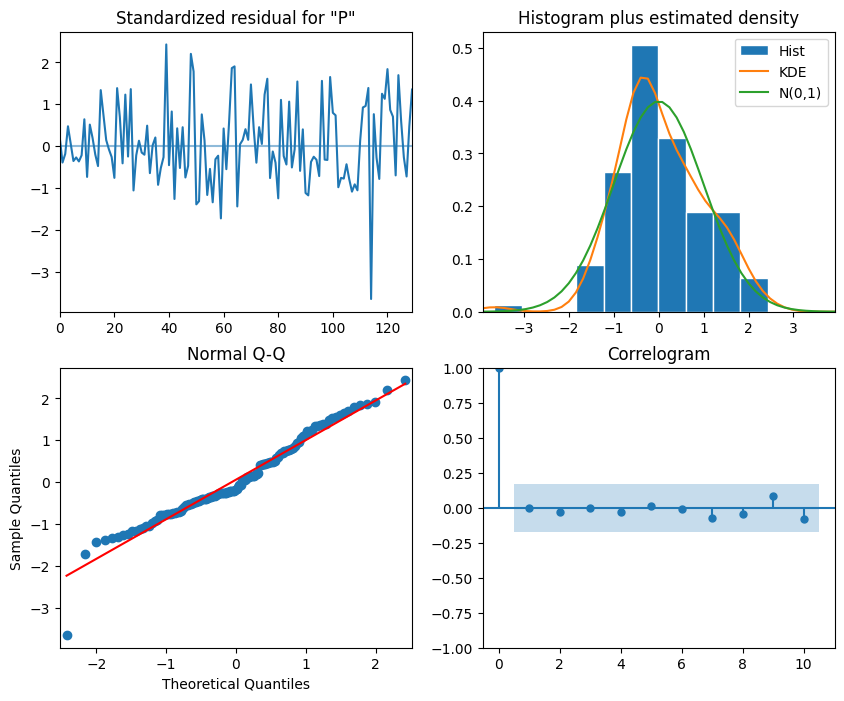

In [10]:
ARIMA_model = SARIMAX(train, order=(11,2,3), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

Basado en el análisis cualitativo, los residuos están cerca del ruido blanco, lo que significa que los errores son aleatorios.

En el gráfico de la parte superior izquierda, los residuos no tienen tendencia y la varianza parece bastante constante a lo largo del tiempo, lo que se asemeja al comportamiento del ruido blanco. El gráfico de la parte superior derecha muestra la distribución de los residuos, que se aproxima a una distribución normal, a pesar del pico inusual. Esto se confirma aún más por el gráfico Q-Q en la parte inferior izquierda, que muestra una línea bastante recta que se encuentra en y = x. Finalmente, el correlograma en el gráfico de la parte inferior derecha no muestra coeficientes de autocorrelación significativos después del rezago 0, lo que es exactamente como el ruido blanco. A partir de este análisis, los residuos se asemejan al ruido blanco.

`El siguiente paso es realizar la prueba de Ljung-Box sobre los residuos para asegurarse de que son independientes y no correlacionados.`

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox
residuals = ARIMA_model_fit.resid
lb_test = acorr_ljungbox(residuals, lags=np.arange(1, 11))  
# Extraer solo los p-values como array
pvalue = lb_test["lb_pvalue"].values
print(pvalue)

[0.01047821 0.03546846 0.07334073 0.10121908 0.13587518 0.19246692
 0.21916521 0.2843914  0.37180278 0.31751854]


`Los valores p devueltos son todos mayores que 0.05, excepto por los dos primeros valores`. Esto significa que, según la prueba de Ljung-Box, rechazamos la hipótesis nula con un 5% de probabilidad de estar equivocados, ya que establecimos nuestro límite de significancia en 0.05. Sin embargo, el tercer valor y los siguientes son todos mayores que 0.05, por lo que rechazamos la hipótesis nula, concluyendo que los residuos son no correlacionados a partir del rezago 3.

Esta es una situación interesante para desglosar, porque el análisis gráfico de los residuos nos lleva a concluir que se asemejan a ruido blanco, pero la prueba de Ljung-Box apunta a alguna correlación en los rezagos 1 y 2. Esto significa que nuestro modelo ARIMA no está capturando toda la información de los datos.

En este caso, avanzaremos con el modelo, porque sabemos que estamos modelando datos estacionales con un modelo no estacional. Por lo tanto, `la prueba de Ljung-Box realmente nos está diciendo que nuestro modelo no es perfecto`, pero está bien, porque parte de este ejercicio es comparar el rendimiento de ARIMA y SARIMA y demostrar que `SARIMA es el camino a seguir cuando se trata de datos estacionales`.

Como se mencionó anteriormente, deseamos predecir un año completo de pasajeros aéreos mensuales, utilizando los últimos 12 meses de datos como nuestro conjunto de prueba. El modelo base es la predicción estacional ingenua, donde simplemente usamos el número de pasajeros aéreos de cada mes de 1959 como pronóstico para cada mes de 1960.

In [13]:
test = df.iloc[-12:]
test['naive_seasonal'] = df['Passengers'].iloc[120:132].values # 2


/tmp/ipykernel_30831/1704995307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_seasonal'] = df['Passengers'].iloc[120:132].values # 2


2. La previsión estacional ingenua simplemente reutiliza los datos de 1959 como pronóstico para 1960.

Podemos agregar las previsiones de nuestro modelo ARIMA(11,2,3) al DataFrame de prueba.

In [14]:
ARIMA_pred = ARIMA_model_fit.get_prediction(132, 143).predicted_mean #1
test['ARIMA_pred'] = ARIMA_pred #2

/tmp/ipykernel_30831/3175151883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ARIMA_pred'] = ARIMA_pred #2


1. Obtén predicciones para cada mes de 1960.
2. Agregue predicciones a la prueba.


`Con las previsiones del modelo ARIMA almacenadas en la prueba, ahora utilizaremos un modelo SARIMA y luego compararemos el rendimiento de ambos modelos para ver si el modelo SARIMA realmente tiene un mejor rendimiento que el modelo ARIMA cuando se aplica a una serie temporal estacional.`

## Pronostico con un modelo SARIMA(p,d,q)(P,D,Q)m

Siguiendo los pasos de nuestro procedimiento general de modelado, primero verificaremos la estacionariedad y aplicaremos las transformaciones requeridas.

In [15]:
ad_fuller_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


La prueba ADF en el conjunto de datos devuelve una estadística ADF de 0.82 y un valor p de 0.99. Por lo tanto, no podemos rechazar la hipótesis nula y la serie no es estacionaria. Podemos aplicar una diferenciación de primer orden y probar la estacionariedad.

In [16]:
df_diff = np.diff(df['Passengers'], n=1)
ad_fuller_result = adfuller(df_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


Esto devuelve una estadística ADF de -2.83 y un valor p de 0.054. Dado que el valor p es mayor que 0.05, no podemos rechazar la hipótesis nula, y la serie sigue siendo no estacionaria. Por lo tanto, apliquemos una diferencia estacional y probemos la estacionaridad.

In [ ]:
""" Diferenciación estacional. Dado que tenemos datos mensuales, m = 12, por lo que la diferencia estacional es 
la diferencia entre dos valores que están separados por 12 periodos de tiempo.
"""
df_diff_seasonal_diff = np.diff(df_diff, n=12) # 1
ad_fuller_result = adfuller(df_diff_seasonal_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -17.62486236026156
p-value: 3.823046855601547e-30


Esto devuelve una estadística ADF de -17.63 y un valor p de 3.82 × 10–30. Con una estadística ADF grande y negativa y un valor p menor que 0.05, podemos rechazar la hipótesis nula y considerar la serie transformada como estacionaria. `Por lo tanto, realizamos una ronda de diferenciación, lo que significa que d = 1, y una ronda de diferenciación estacional, lo que significa que D = 1.`